## Bias, Variance and k-Nearest Neighbours

Last revision: Tue 28 May 2024, 17:40:00 AEST

This lab was tested with the following packages:

- `sklearn==1.4.2`
- `numpy==1.26.4`
- `matplotlib==3.8.4`

## Introduction

In this lab we will continue our discussion of bias and variance through a detailed example using simulated data. We then work through the K-Nearest Neighbours algorithm in detail. We address the curse of dimensionality, which plagues the k-Nearest Neighbours algorithm. Finally, as optional advanced material, we discuss linear smoothing.

## Bias-Variance Decomposition

We first explore the concepts of bias and variance, as well as the idea of a bias-variance decomposition. We begin with a short mathematical explanation of bias and variance, and then reinforce the theory with code.

We begin by discussing the Bias-Variance decomposition, a central theme in Statistics and Machine Learning. Assume that we are interested in estimating some population parameter $\theta$, and we have access to a finite dataset $D = \{X_1,\dots, X_n\}$, which we assume is independently sampled. To give a concrete example, suppose we are interested in estimating the average WAM of students in COMP9417, but we only have access to the WAM of a small subset of 22 randomly sampled students. The population here is all students in the course, and we must infer information about the true mean using only information about a small subset. 

When $\theta$ denotes the population mean, one standard estimator to use is the sample-mean:

$$
\hat{\theta} = \frac{1}{n} \sum_{i=1}^n X_i.
$$

However, this is only one estimator, and we could use others, for example, the sample median:

$$
\tilde{\theta}=\text{median}(X_1,\dots,X_n)
$$

or, for a silly example, we could simply choose to estimate $\theta$ by the second datapoint

$$
\dot{\theta} = X_2.
$$

These are all valid estimators of $\theta$, but of course some are better than others (obviously $\dot{\theta}$ will be a useless estimator in almost all examples. Bias and Variance of estimators are two metrics we may use to quantify how good an estimator actually is. 

### Bias

We first start with the mathematical definition and then explain the intuition behind that definition. Given an estimator $\hat{\theta}$ for population parameter $\theta$, we define the bias of $\hat{\theta}$ as

$$
\text{Bias}(\hat{\theta}) = \mathbb{E}[\hat{\theta}] - \theta,
$$

where $\mathbb{E}$ denotes expectation. The bias simply measures how far away the expected value of our estimator is from the truth. An estimator with zero bias is called an unbiased estimator. All else equal, an unbiased estimator is better than a biased estimator.

### Variance

The variance of an estimator $\hat{\theta}$, is denoted by $\text{Var}(\hat{\theta})$ and is defined in the usual way

$$
\text{Var}(\hat{\theta}) = \mathbb{E} [ ( \hat{\theta} - \mathbb{E}[\hat{\theta} ] )^2]
$$

### Interpretation - An important point
An important question arises here: what does it mean to take an expectation (or variance) of an estimator $\hat{\theta}$? How do we compute these values? For the purpose of this lab, we will side-step the proper mathematical definitions and try to answer this question in a more intuitive sense. We can think of our dataset $D$ as being just one of infinitely many datasets. Let's imagine that we have access to a black-box $B$ that we can query datasets from. We label these datasets: $D_1,D_2,\dots, D_{\infty}$, and for simplicity we assume that each dataset consists of the same number $n$ of samples. For clarity, we have:

\begin{align*}
D_1 &= \{ X^{(1)}_1, X^{(1)}_2,\dots,X^{(1)}_n \} \\
D_2 &= \{ X^{(2)}_1, X^{(2)}_2,\dots,X^{(2)}_n\}\\
D_3 &= \{ X^{(3)}_1, X^{(3)}_2,\dots,X^{(3)}_n\}\\
&  \vdots
\end{align*}

Now, assume that we have chosen an estimator $\hat{\theta}$. This estimator is a function of the dataset, so for each dataset, we can compute a new estimate. For example, if we wish to use the sample mean, then our estimate for each dataset would just be the sample-mean of each dataset:

\begin{align*}
\hat{\theta}_1 &= \overline{X}_1 = \frac{1}{n} \sum_{i=1}^n X_i^{(1)}\\
\hat{\theta}_2 &= \overline{X}_2 = \frac{1}{n} \sum_{i=1}^n X_i^{(2)}\\
&  \vdots
\end{align*}

and so on. Now, we can think of the quantity $\mathbb{E}[\hat{\theta}]$ as being the average value of $\hat{\theta}$ over an infinite number of datasets. Similarly, we can think of $\text{Var}(\hat{\theta})$ as the variance of $\hat{\theta}$ over an infinite number of datasets. 

Note that this is a purely theoretical construction because we do not have access to a black-box $B$ that allows us to generate multiple datasets (in fact we will usually only have access to a single dataset), and secondly even if we did have access to $B$, we cannot sample an infinite number of datasets. This theoretical construction does however help us understand the benefits of different estimators and has led to the proposal of many important algorithms in machine learning that have had great empirical success.

### Bias-Variance for Learning Functions
Up to this point, you should have understood the basic concepts underlying the bias-variance decomposition. We now tie this back into the machine learning framework. In a general (supervised) learning problem, we have access to a dataset $D$ which consists not only of feature vectors $X$, but also response values $y$, so that 

$$
D = \{(x_1,y_1),\dots,(x_n, y_n)\}.
$$

We assume that there exists some true (but unobservable) function $f$ that takes as input a feature vector $X$ and outputs a response $y$. We will also assume that the observed responses are corrupted by some additive noise. In other words, our assumption is that:

$$
y = f(x) + \epsilon, \qquad \epsilon \sim (0,\sigma^2),
$$

where the notation $\epsilon \sim (0,\sigma^2)$ means that $\epsilon$ is a random variable with zero mean and variance $\sigma^2$. One way to think about $\epsilon$ is that it represents measurement error. For example, if we are measuring temperature on a given day using a thermometer, then our measurement might consist of the 'true' temperature, $f(x)$, plus some noise due to the usage of a cheap theormometer. The most common assumption is that $\epsilon$ is normally distributed, so we write: $\epsilon \sim N(0,\sigma^2)$.

Now, the goal of learning is to use the data $D$ to find an estimate of $f$, which we call $\hat{f}$, so that $f$ and $\hat{f}$ are as close as possible in some sense. One common way to do this is to learn a $\hat{f}$ that minimizes the Mean Squared Error (MSE) between $y$ and $\hat{f}$. So far in this course, we have seen many ways of computing such an estimate $\hat{f}$, for example, linear regression, SVMs, Neural Networks, etc. It turns out that regardless of how you choose to construct your estimate, there exists a decomposition of the MSE (the expected squared error of $\hat{f}$ on a previously unseen example, i.e. test MSE), called the Bias Variance Decomposition:

$$
\mathbb{E} [(y- \hat{f}(x))^2] = \left ( \text{Bias}(\hat{f}(x)) \right)^2 + \text{Var}(\hat{f}(x)) + \sigma^2,
$$

where as before, we have 

$$
\text{Bias}(\hat{f}(x)) = \mathbb{E} [\hat{f}(x)] - f(x).
$$

In other words, the MSE of $\hat{f}$ may be decomposed into a sum of three terms:

1. (Squared) Bias: As discussed earlier, bias captures how far an estimate is from its target. Intuitively, simple algorithms (i.e. those with few parameters, such as linear models) will have high bias, since the 'true' function $f$ is rarely linear). We will see that models with low flexibility (linear models) tend to have high bias, and those with high flexibility (neural nets will have low bias).

2. Variance: this captures how sensitive the learning method is to changes in the dataset. i.e. given two datasets $D_1$, $D_2$, how different are the corresonding estimates $\hat{f}_1(x)$ and $\hat{f}_2(x)$? We will see that flexible learning algorithms, such as neural nets, will have high variance. Intuitively, since neural nets are so powerful, they can fit pretty much any decision surface, so estimates on different datasets can vary greatly.

3. $\sigma^2$: this is called the irreducible error, and since our responses contain noise, this is the error we have to live with in our predictions, regardless of the learning algorithm we use.

It is important to understand why these factors contribute to the overall test error. A learning algorithm with high bias is unlikely to be able to fit the true function, and so will do poorly when asked to make a prediction on a new test point (underfitting). A learning algorithm with high variance will have a lot of flexibility, and so will fit the training data very well, but this does not necessarily mean it will be able to generalise well (overfitting).

It turns out that there is a trade-off between bias and variance. That is, learning algorithms that have low bias will tend to have high variance, and vice versa. In machine learning, we wish to find models that minimise MSE, and so we have to choose models that achieve the right balance between these two competing criteria.

### Illustrating the Bias-Variance Decomposition
In order to illustrate these concepts and hopefully make them more understandable, we will now work through an extended example in code. The idea is to assume we have access to the blackbox $B$, from which we will generate multiple datasets from, and build models of increasing complexity from. To start with, consider the function:

$$
f(x) = 0.001 x^3
$$

We next write a function to sample noisy examples from this function, with noise taken to be Normally distributed with mean zero and standard deviation $\sigma=0.1$. We will assume that the input values $x$ are uniformly distributed from $x=1$ to $x=10$, and this choice is completely arbitrary.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

<font color='purple'>
    
#### Exercise: 
Code up the true function and name this implementation `f`. Then define another function called `f_sampler(f, n, sigma, seed=None)` that:
1. if `seed` is provided, then seeds the random number generator using `np.random.seed(seed)`
2. generates $n$ random uniform $(0,10)$ evaluation point values, called $x_1,\dots, x_n$
3. generates $n$ random normal $(0,\sigma^2)$ noise variables, called $\epsilon_1,\dots, \epsilon_n$
4. generate $n$ noisy observations from $f$, called $y_1,\dots,y_n$ where $y_i = f(x_i) + \epsilon_i$.

Finally, plot the true function in blue, and a scatter of the $n$ points in red on the same plot.

In [2]:
# true function
f = lambda x: 0.001 * x**3

def f_sampler(f, n=100, sigma=0.1, seed=None):
    if seed:
        np.random.seed(seed)
    
    # sample points from function f with Gaussian noise (0, sigma**2)
    xvals = np.random.uniform(low=1, high=10, size=n)
    yvals = f(xvals) + sigma * np.random.normal(0, 1,size=n)
    
    # build dataset D
    D = np.zeros(shape=(n, 2))
    D[:,0] = xvals; D[:,1] = yvals; 
    
    return D

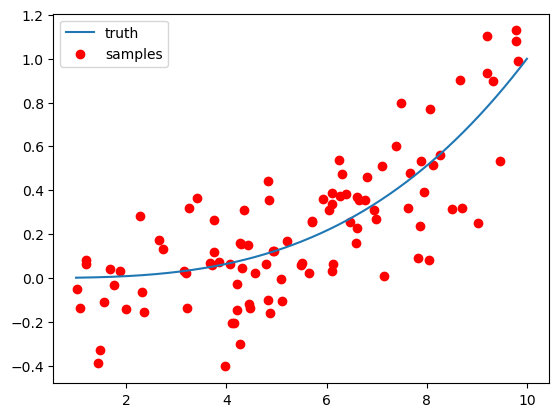

In [3]:
fsamples = f_sampler(f, 100, sigma=0.2)

xx = np.linspace(1, 10, 1000)
plt.plot(xx, f(xx), label="truth")
plt.scatter(*fsamples.T, color="red", label="samples")
plt.legend()
plt.show()

We can generate an infinite number of datasets (we have access to the blackbox) in this way. Let's consider 9 different datasets, call them $D_1,\dots,D_9$. Note that they are all generated from the same $f(x)$, which is the blue function in the plots, but due to the randomness in the noise, each of the datasets is different. In a learning problem, we will only have access to the dataset of the form $(x_i, y_i), i=1,\dots, n$ and the goal is to try to recover $f$ from this data. We usually denote our estimate of $f$ by putting a hat on the parameter of interest, i.e. $\hat{f}$. 

To estimate $f$, we usually try to put assumptions on the form of the unkown $f$. In the linear regression case for example, we make the simplifying assumption that $f(x)$ is a linear function.

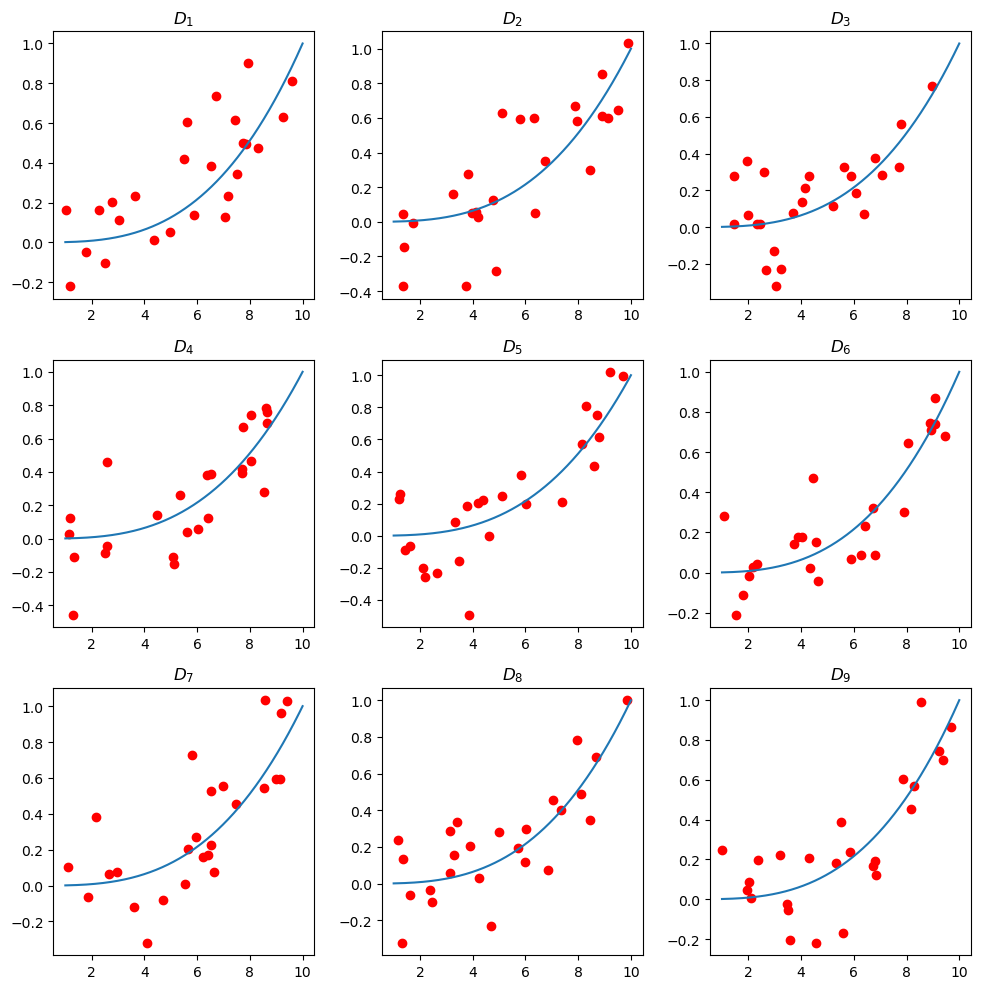

In [4]:
fig, ax = plt.subplots(3, 3, figsize=(10, 10))
np.random.seed(10)
for i, ax in enumerate(ax.flat):
    ax.plot(xx, f(xx), label="truth")
    fsamples = f_sampler(f, 25, sigma=0.2)
    ax.scatter(*fsamples.T, color="red", label="samples")
    ax.set_title(f"$D_{i+1}$")
plt.tight_layout()
plt.show()

To understand bias and variance, the idea now will be to fit a model to each of the datasets, and see how the fits vary from dataset to dataset. A simple model to begin with is linear regression (with a single feature $x$). This model has high bias because it has a very strict assumption on the shape of the model, regardless of the data. It has low variance because models fit on different datasets will not vary too much. We can see this empirically for the 9 generated datasets, and we will plot the fitted models in green on each plot in the grid.

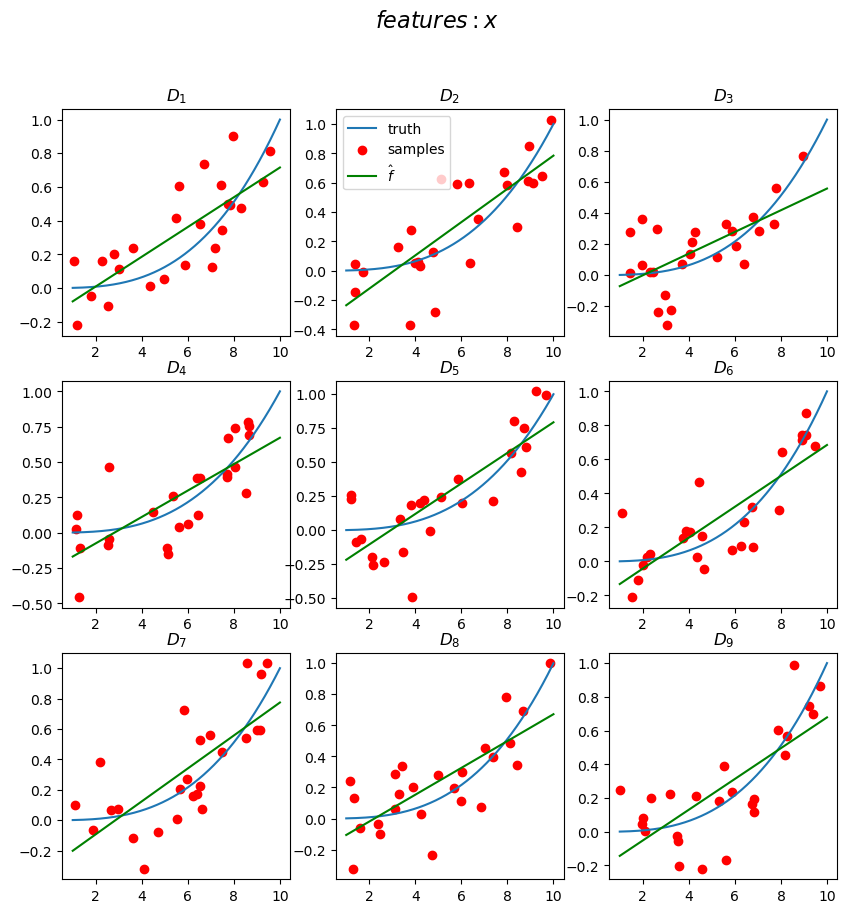

In [5]:
fig, ax = plt.subplots(3, 3, figsize=(10, 10))

mod = LinearRegression()
lr = lambda x: mod.intercept_[0] + mod.coef_[0]*x
np.random.seed(10)

mods = np.zeros((9, 2))      # store models
for i, ax in enumerate(ax.flat):
    ax.plot(xx, f(xx), label="truth")
    fsamples = f_sampler(f, 25, sigma=0.2)
    ax.scatter(*fsamples.T, color="red", label="samples")
    ax.set_title(f"$D_{i+1}$")
    
    # build model
    X = fsamples[:,0].reshape(-1,1)
    y = fsamples[:,1].reshape(-1,1)
    mod.fit(X, y)
    mods[i] = np.array([mod.intercept_[0], mod.coef_[0, 0]])
    ax.plot(xx, lr(xx), color="green", label="$\\hat{f}$")
    
    # include legend on only second plot
    if i==1:
        ax.legend()
    
fig.suptitle("$features: x$", fontsize=16)
plt.show()

Note that the fitted model does not vary much from dataset to dataset. Linear models with a single feature do not have much ability to fit complicated trends in the data (they must be a straight line), and so will exhibit low variance, and high bias. Let's compute these quantities for our toy example at a single point, say $x_0 = 5$. 

The bias is the expected value of the model at $x_0$ minus the true value of $f$ at $x_0$, i.e. $f(x_0)$. Recall that in order to compute the expected value at $x_0$, we must be able to sample an infinite number of datasets, fit a model, then average. Here we will use the average of the predictions of the 9 models at $x_0$ as a proxy. To compute variance, we compute the variance of the predictions of all 9 models at $x_0$. We can see from the plot that linear regression has high bias, and low variance. Compare this picture to the picture we looked at earlier with the bias/variance targets.

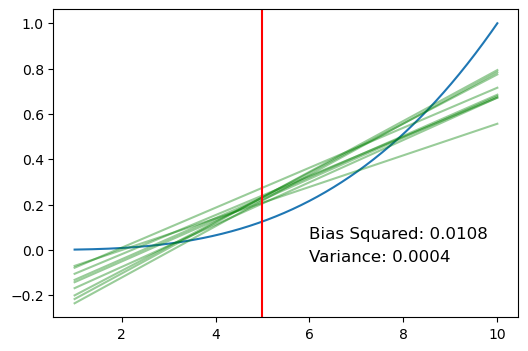

In [6]:
x0 = 5
x0_preds = np.zeros(9)
plt.figure(figsize=(6, 4))
plt.plot(xx, f(xx))
for i in range(9):
    lr = lambda x: mods[i, 0]+mods[i, 1]*x
    plt.plot(xx, lr(xx), color="green", alpha=0.4)
    
    x0_preds[i] = lr(x0)

bias_squared = round((np.mean(x0_preds)-f(x0))**2, 4)
variance = round(np.var(x0_preds), 4)

plt.axvline(x0, color="red")
plt.annotate(f'Bias Squared: {bias_squared}', (6, 0.05), size=12, color='black')
plt.annotate(f'Variance: {variance}', (6, -0.05), size=12, color='black')
plt.show()

The above plot shows the $9$ fitted models (in blue), and the true function $f$ in blue. We see that $x_0=5$, all $9$ models seem to do quite poorly as they are unable to fit the curvature in the true model. The bias here is high because the estimate is consistently far away from the truth. Note however that all $9$ models more or less predict the same value for $x_0$, and so exhibit very lower variance.

We can now investigate a more complex model by adding polynomial features to the linear regression. As we add higher order terms, we will be able to fit more complicated (curvy) functions. $\hat{y} = a + bx + cx^2$

<font color='purple'>
    
#### Exercise: 
Re-do the previous analysis, but now use both $x$ and $x^2$ when fitting the linear regression model. Create the same grid of plots as before but with your new model, and plot the bias and variance. What do you notice?

Hint: see the `sklearn` documentation here to get a better idea of how to fit a linear model with two covariates: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

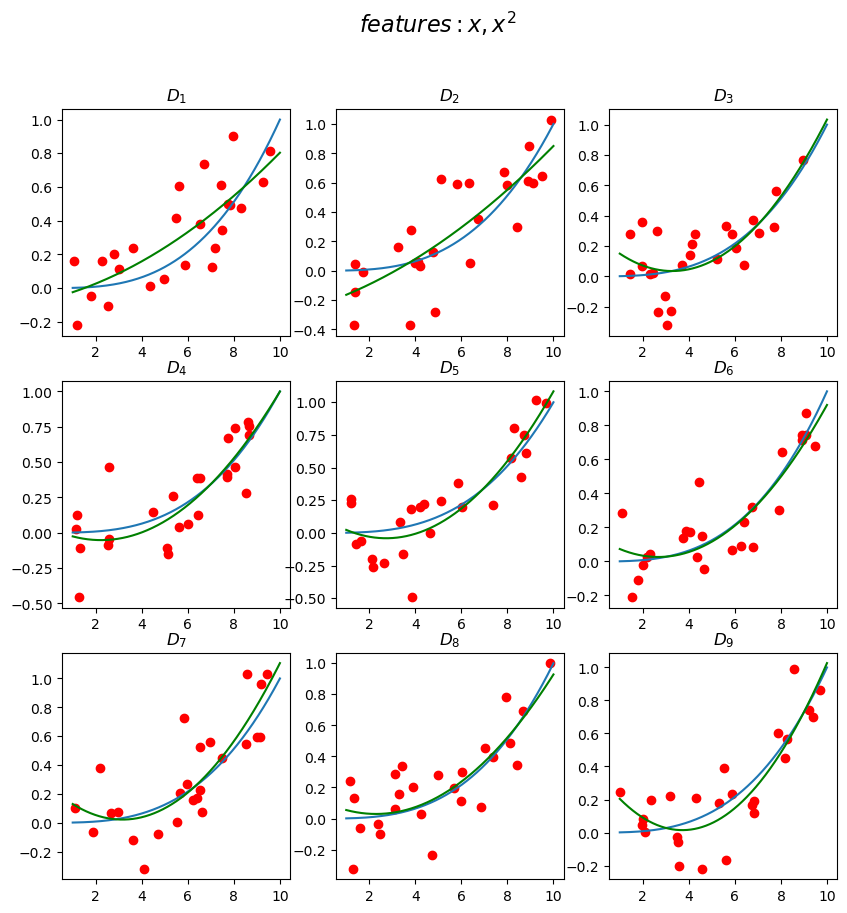

In [7]:
fig, ax = plt.subplots(3,3, figsize=(10, 10))

mod = LinearRegression()
lr = lambda x: mod.intercept_[0] + mod.coef_[0, 0]*x + mod.coef_[0, 1]*x**2
np.random.seed(10)

mods = np.zeros((9, 3))                                  # store models
for i, ax in enumerate(ax.flat):
    ax.plot(xx, f(xx), label="truth")
    fsamples = f_sampler(f, 25, sigma=0.2)
    ax.scatter(*fsamples.T, color="red", label="samples")
    ax.set_title(f"$D_{i+1}$")
    
    # build model
    X = fsamples[:,0].reshape(-1,1)
    X = np.concatenate((X,X**2), axis=1)                # polynomial features
    y = fsamples[:,1].reshape(-1,1)
    mod.fit(X, y)
    mods[i] = np.array([mod.intercept_[0], *mod.coef_[0]])
    ax.plot(xx, lr(xx), color="green", label="$\\hat{f}$")
fig.suptitle("$features: x, x^2$", fontsize=16)
plt.show()

<font color='green'>

Now that we have more flexibity (due to increasing the feature set to include quadratic terms), we see that learning algorithm can better fit the data, and we also see that there is slightly more variation across fits. Let's repeat our analysis above for $x_0=5$.

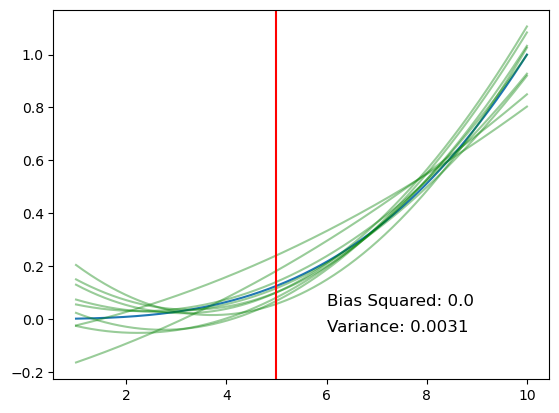

In [8]:
plt.plot(xx, f(xx))
for i in range(9):
    lr = lambda x: mods[i,0]+mods[i,1]*x+mods[i,2]*x**2
    plt.plot(xx, lr(xx), color="green", alpha=0.4)
    x0_preds[i] = lr(x0)

bias_squared = round((np.mean(x0_preds)-f(x0))**2, 4)
variance = round(np.var(x0_preds), 4)

plt.axvline(x0, color="red")
plt.annotate(f'Bias Squared: {bias_squared}', (6, 0.05), size=12, color='black')
plt.annotate(f'Variance: {variance}', (6, -0.05), size=12, color='black')
plt.show()

<font color='purple'>
    
#### Exercise: 
Add more polynomial features: $a + bx + cx^2 + dx^3+ex^4 + fx^5 + g x^6$ and re-run the experiment. Comment on your results.

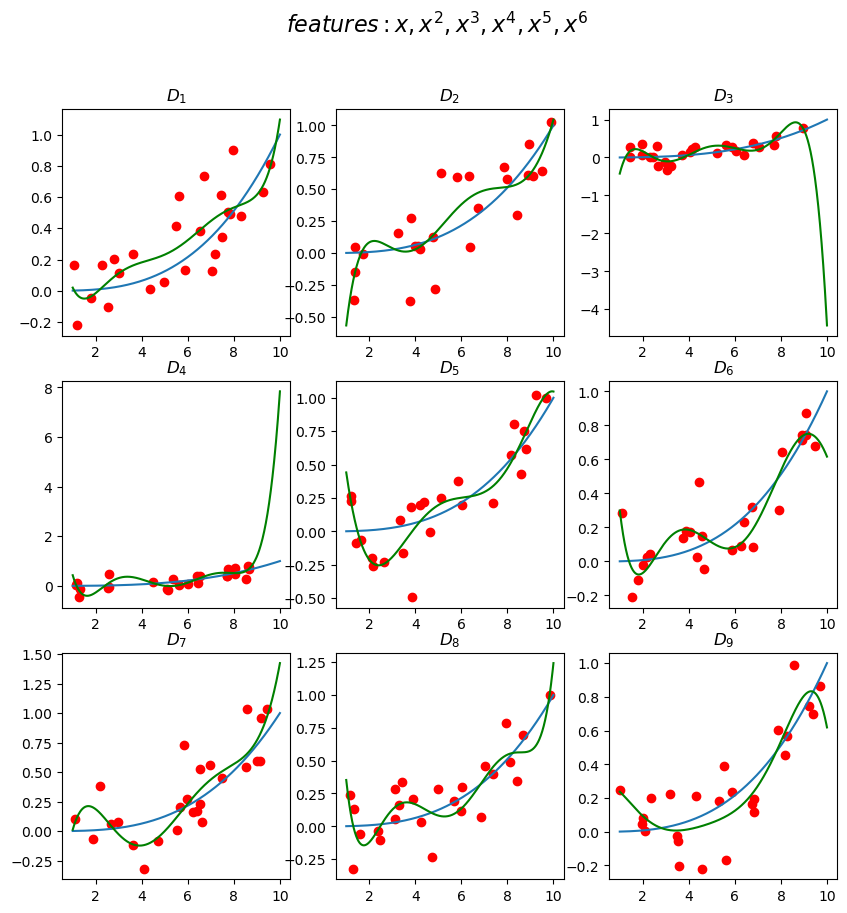

In [9]:
fig, ax = plt.subplots(3,3, figsize=(10,10))
np.random.seed(10)

mods = np.zeros((9, 7))      # store models
for i, ax in enumerate(ax.flat):
    ax.plot(xx, f(xx), label="truth")
    fsamples = f_sampler(f, 25, sigma=0.2)
    ax.scatter(*fsamples.T, color="red", label="samples")
    ax.set_title(f"$D_{i+1}$")
    
    # build model
    X = fsamples[:,0].reshape(-1,1)
    X = np.concatenate((X, X**2, X**3, X**4, X**5, X**6), axis=1)       # polynomial features
    y = fsamples[:,1].reshape(-1,1)
    mod = LinearRegression().fit(X, y)
    lr = lambda x: mod.intercept_[0] + mod.coef_[0][0]*x + mod.coef_[0][1]*x**2 +\
    mod.coef_[0][2]*x**3 + mod.coef_[0][3]*x**4 + mod.coef_[0][4]*x**5 + + mod.coef_[0][5]*x**6
    mods[i] = np.array([mod.intercept_[0], *mod.coef_[0]])
    ax.plot(xx, lr(xx), color="green", label="$\\hat{f}$")
    
fig.suptitle("$features: x, x^2, x^3, x^4, x^5, x^6$", fontsize=16)
plt.show()

<font color='green'>

Now the models have a very large amount of flexibility, and are able to fit more and more complex fits. We can see from the plot above that the fitted models vary greatly from dataset to dataset.

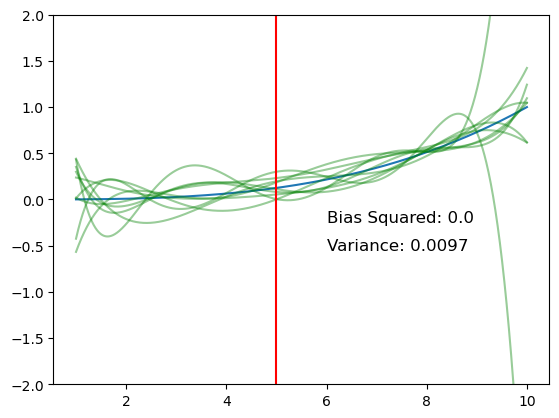

In [10]:
plt.plot(xx, f(xx))
for i in range(9):
    lr = lambda x: mods[i,0] + mods[i,1]*x + mods[i,2]*x**2 +\
    mods[i,3]*x**3 + mods[i,4]*x**4 + mods[i,5]*x**5 + + mods[i,6]*x**6
    plt.plot(xx, lr(xx), color="green", alpha=0.4)
    x0_preds[i] = lr(x0)



plt.axvline(x0, color="red")
plt.ylim(-2,2)
plt.annotate(f'Bias Squared: {round((np.mean(x0_preds)-f(x0))**2,4)}', (6, -0.25), size=12, color='black')
plt.annotate(f'Variance: {round(np.var(x0_preds),4)}', (6, -0.55), size=12, color='black')
plt.show()

We see that as the complexity increases, so too does the variance. As we increase the complexity of the model, it has more and more flexibility to fit complex functions. The problem is that for different datasets, the models end up fitting the noise in the data. The high variance comes from the fact that for different datasets, we can get wildly different models. So there is a tradeoff here, which is known as the bias variance decomposition. If we want to reduce test error, then we want to be able to reduce the bias AND reduce the variance, but as we reduce bias sufficiently, the variance begins to increase.

<font color='purple'>
    
#### Advanced Exercise: 
Let's consider a more interesting function:

$$
f(x) = 0.00002 x^3 + 0.2 \cos(x^{1.2}).
$$

1. Generate 80 datasets from $f$ using $\sigma=0.1$ each of size $n=100$.
2. For each dataset, fit 9 models: the first model being a linear regression with degree 1, the second having both $x$ and $x^2$, and the final model having $x,\dots, x^9$ as features.
3. Create a 3x3 grid of plots, each sub-plot corresponding to a given degree (1-9). On each sub-plot, plot the true function in red, the 80 fitted functions in blue, and the average of the 80 fitted functions in yellow.
4. Now, using the above data, try to visualise the bias and variance at each of the points on the $x$-axis.
5. Comment.

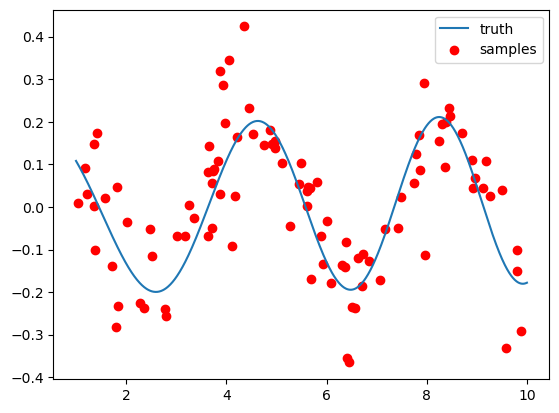

In [11]:
np.random.seed(10)

# true function
f = lambda x: 0.00002 * x**3 + 0.2 * np.cos(x**1.2)

fsamples = f_sampler(f, 100, sigma=0.1)

xx = np.linspace(1,10,1000)
plt.plot(xx, f(xx), label="truth")
plt.scatter(*fsamples.T, color="red", label="samples")
plt.legend()
plt.show()

In [12]:
nmb_datasets = 80
xx_len = 1000
np.random.seed(10)

# generate datasets
datasets = np.array([f_sampler(f, 25, sigma=0.2)
                     for _ in range(nmb_datasets)])
xx = np.linspace(1,10, xx_len)

# store all predictions for all models
preds = np.zeros(shape=(9, nmb_datasets, xx_len))

for deg in range(1, 10):
    Xs = np.array([D[:,0].reshape(-1,1) for D in datasets])
    ys = np.array([D[:,1].reshape(-1,1) for D in datasets])
    poly = PolynomialFeatures(degree=deg, include_bias=False)

    # get polynomial feature matrix
    Xs = np.array([poly.fit_transform(X) for X in Xs])
    
    # fit models on all datasets
    lrs = np.array([LinearRegression().fit(X, y) 
                    for (X, y) in zip(Xs, ys)])
    
    # predictions on range xx 
    xx_poly = poly.fit_transform(xx.reshape(-1,1))
    preds[deg-1, :, :] = (
        np.array([mod.predict(xx_poly) for mod in lrs])
        .reshape(nmb_datasets, xx_len)
    )
    

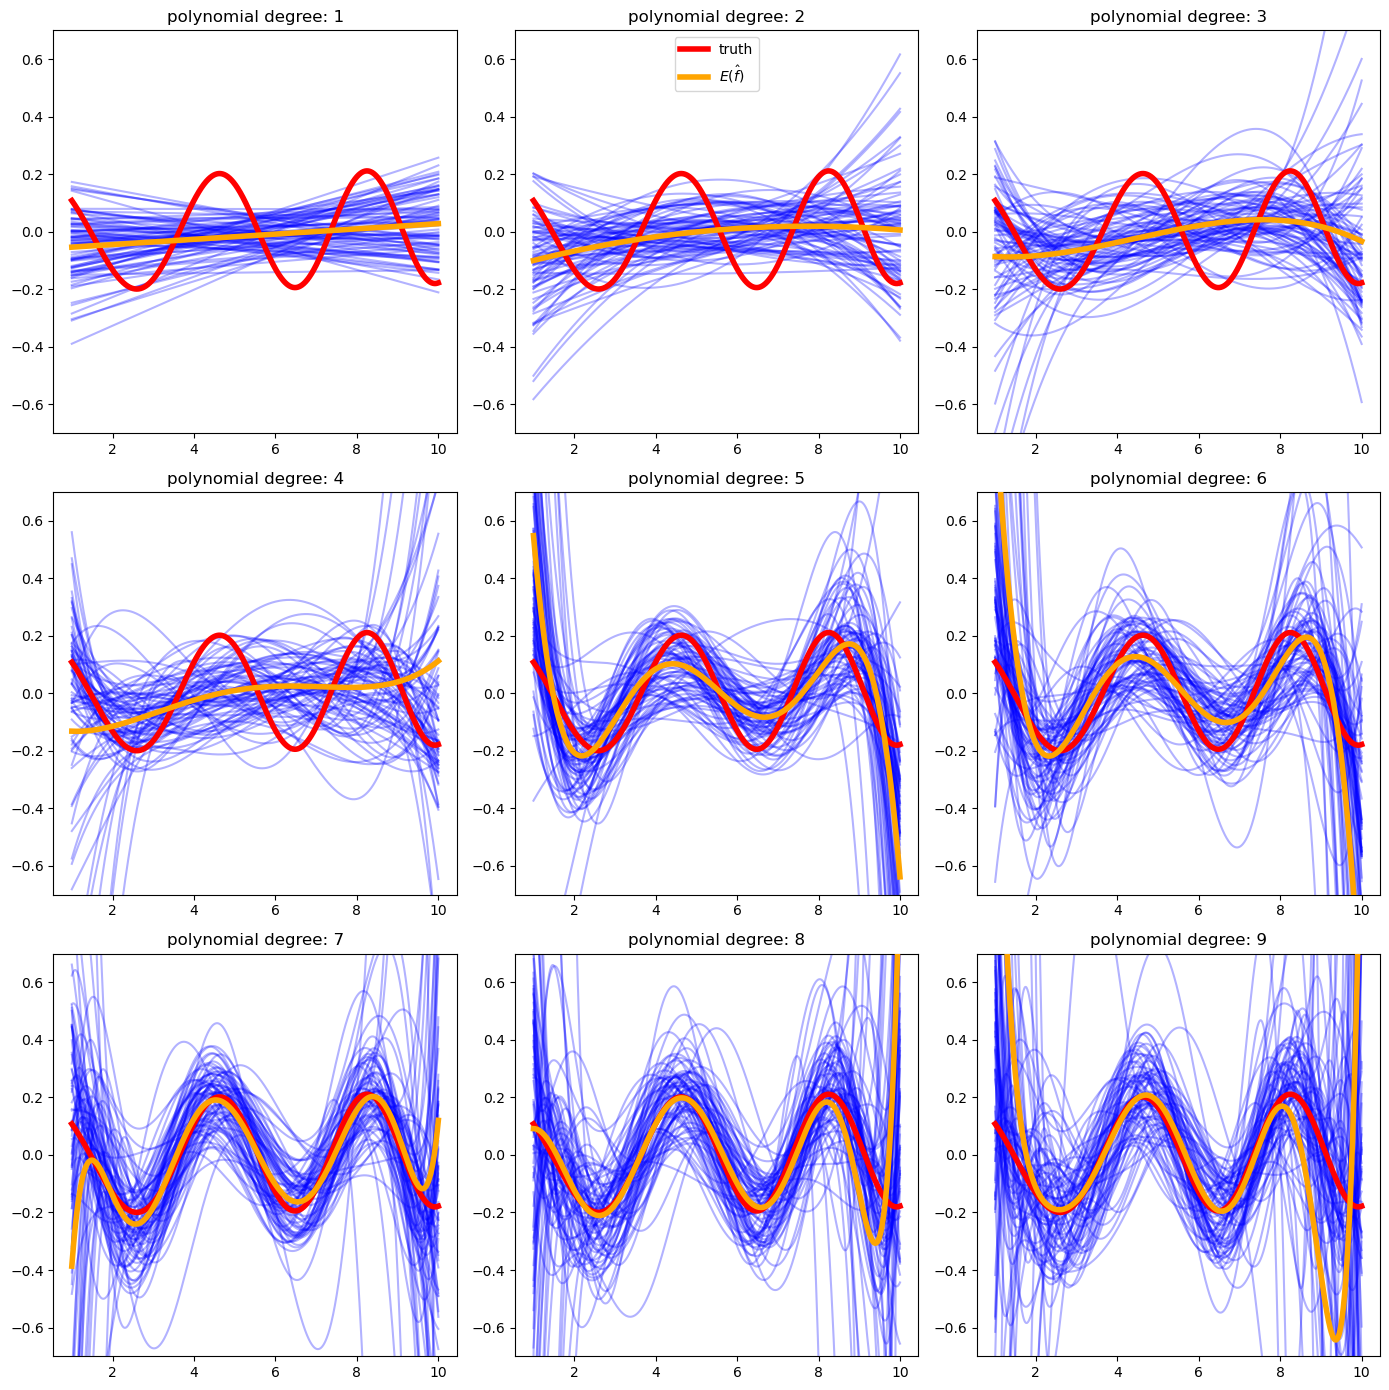

In [13]:
fig, ax = plt.subplots(3,3, figsize=(14,14))
truth = f(xx)
for j, ax in enumerate(ax.flat):
    avg_pred = np.mean(preds[j], axis=0)
    ax.plot(xx, truth,
            color="red",
            linewidth=4,
            zorder=20,
            label="truth")
    ax.plot(xx, avg_pred,
            color="orange", 
            linewidth=4,
            zorder=20,
            label="$E(\\hat{f})$")    
    for i in range(nmb_datasets):
        ax.plot(xx, preds[j, i], alpha=0.3, color="blue", zorder=1)
        ax.set_title(f"polynomial degree: {j+1}")
        ax.set_ylim(-0.7, 0.7)
    if j==1: ax.legend(loc="upper center")
plt.tight_layout()
plt.show()

<font color='green'>

Note that we should ignore the wild behaviour at the tails for this analysis, since this is caused by the way we build the model using linear regression. To get a better idea of the bias variance trade-off we should restrict attention to points in the middle 90\% or so.

In [14]:
variances = np.zeros(shape=(9, xx_len))
bias_sq = np.zeros(shape=(9, xx_len))
for i in range(9):
    variances[i,:] = np.var(preds[i], axis=0)
    bias_sq[i,:] = (np.mean(preds[i], axis=0) - f(xx))**2

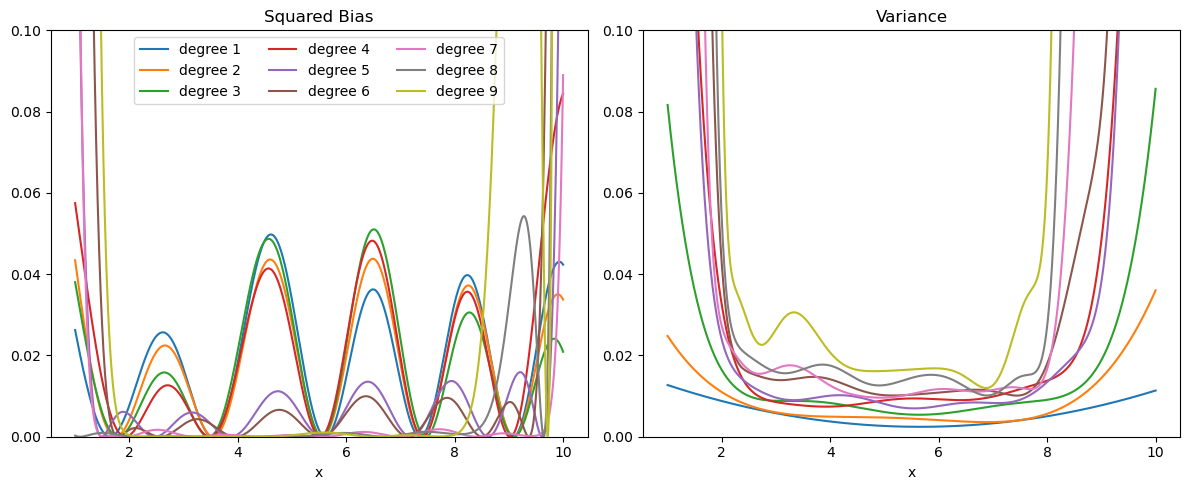

In [15]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,5))
for i in range(9):
    ax1.plot(xx, bias_sq[i], label=f"degree {i+1}")
    ax2.plot(xx, variances[i])
    ax1.set_ylim(0,0.1)
    ax2.set_ylim(0,0.1)
    ax1.set_xlabel("x"); ax2.set_xlabel("x")
    ax1.set_title("Squared Bias")
    ax2.set_title("Variance")
ax1.legend(loc="upper center", ncol=3)
plt.tight_layout()

## kNN
We now explore kNN classification and kNN regression. Both classification and regression variants require an understanding of the k-neighbour function: $\mathcal{N}_k(x)$. The $k$-neighbour function simply returns the $k$ points in the dataset that are nearest to the input $x$. We can define 'nearest' here quite broadly, and it is up to the modeler to come up with a distance function that they would like to use; the most common choice is the Euclidean distance $\|\cdot\|_2$.

#### Toy Regression Example
Note that kNN regression is also the most basic example of 'local regression'.

Let's assume we have data $X=[-1,0,1,2,3,4], y=[0.5,0.25,1,0.2, 0.8,3]$, and we choose $k=3$. Given an input point $x=0.25$, we have:

$$
\mathcal{N}_3(0.25) = \{ -1,0,1 \}.
$$

Now that we have identified the 3-NN of $x$, we need to return a prediction for it. The idea in kNN is just to use an average over the neighbours, so:

$$
\hat{y}(0.25) = \frac{1}{3} [0.5+ 0.25 +1 ] \approx 0.58
$$

is our prediction for this input. More rigorously, an average over the $k$-nearest neighbours can be written:

\begin{align*}
\hat{y}(x) 
&= \frac{1}{k} \sum_{i \in \mathcal{N}_k (x)} Y_i \\
&= \sum_{i=1}^n \frac{1}{k}\mathbf{1}\{\text{$X_i$ is a kNN of $x$} \} Y_i.
\end{align*}

#### Modification for Classification
The kNN classifier works in the same was as kNN regression, except that instead of averaging, we take a majority vote of the class labels. This works for multi-class classification as well.

#### Note
The examples we showed here use numerical data, as in $X$ is comprised of numbers. However, kNN works whenever you have a way of measuring distance between objects. For example, if $X$ represented words in the alphabet that you were trying to classify into given classes, you could use kNN with Levenshtein (edit) distance.

For regression problems we'll simulate toy data from the model:

\begin{equation}
y=f(x) + \epsilon, \qquad f(x) = 0.3 \cos(x) + 0.4 \ln(10x), \quad \epsilon \sim N(0,\sigma^2), \quad \sigma=0.2.
\end{equation}

The `f_sampler` function created in the previous section is used.

<font color='purple'>
    
#### Exercise: 
In this exercise, we will write code to implement kNN regression from scratch. Generate data using the following code:

```
f = lambda x: 0.3 * np.cos(x) + 0.4 * np.log(10*x)
fsamples = f_sampler(f, 80, sigma=0.2, seed=120)
X = fsamples[:, 0]
y = fsamples[:, 1]
```

Write a function `kNNRegression(x, X, y, k)` that implements kNN regression (i.e., predicts a value for `x` where `x` is potentially an array of inputs based on data `X`, `y`) using $k$ neighbours and using euclidean distance. Run the algorithm with $k=1,\dots, 16$ and $p=2$ and plot each fit on a $4 \times 4$ grid plot, one plot for each $k$. Be sure to plot the original function and the samples on the same plot as well.

Hint: the function `np.argsort` might be useful here.
    

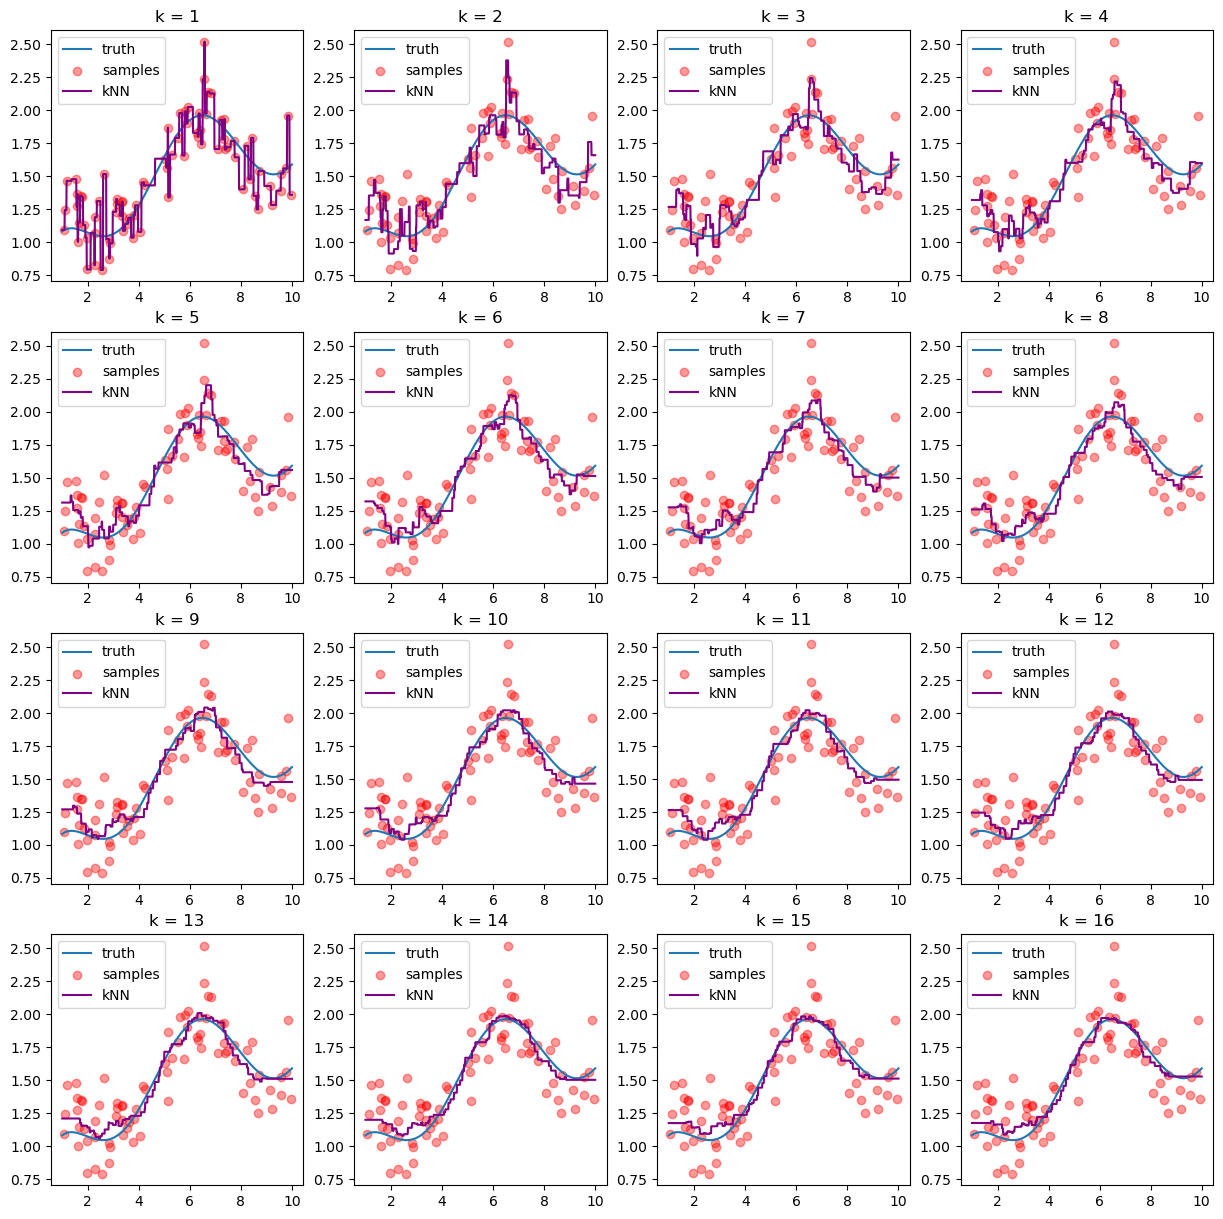

In [16]:
### Solution

f = lambda x: 0.3 * np.cos(x) + 0.4 * np.log(10*x)
fsamples = f_sampler(f, 80, sigma=0.2, seed=120)
X = fsamples[:, 0]
y = fsamples[:, 1]


def kNNRegression_(x0, X, y, k):
    # given single point x0, returns knn prediction
    
    # indices of k nearest neighbours of x0
    kNearestIdx = np.argsort(np.sqrt((X-x0)**2))[:k]
    
    # y values of k nearest neighbours of x0
    kNearesty = y[kNearestIdx]

    return kNearesty.mean()

def kNNRegression(x, X, y, k):
    # generalize kNNRegression_ to work on array of inputs
    return np.apply_along_axis(kNNRegression_, 1, x.reshape(-1,1), X, y, k)
   

# generate plot
fig, axes = plt.subplots(4,4,figsize=(15,15))

xx = np.linspace(1,10,1000)

for i, ax in enumerate(axes.flat):
    ax.plot(xx, f(xx), label="truth")
    ax.scatter(*fsamples.T, color="red", label="samples", alpha=0.4)
    ax.plot(xx, kNNRegression(xx, X, y, k=i+1), color='purple', label='kNN')
    ax.set_title(f"k = {i+1}")
    ax.legend()
plt.show()

#### kNN with `sklearn`
Of course, `sklearn` has existing implementations of both kNN classification and kNN regression. These can be found by running:

```
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
```

Their usage follows the same standard `sklearn` approach as in other labs.

We demonstrate `KNeighboursClassifier` with a toy example. We use the `sklearn.datasets.make_blobs` function, which gives us a quick way to create toy data for classification. In the following we'll create a 3 class classification problem.

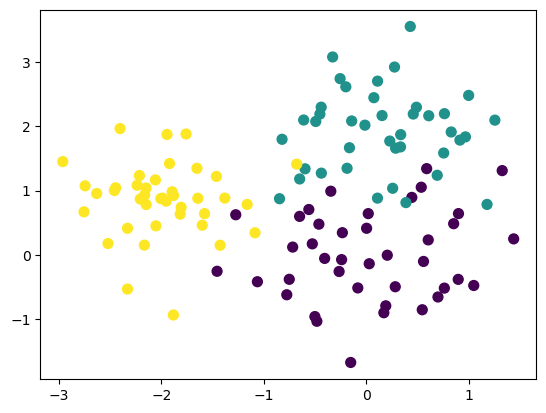

In [17]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=120,                           # total number of samples  
                  centers=[[0,0], [0,2], [-2,1]],          # cluster centers of the 3 classes
                  random_state=123,                        # reproducibility 
                  cluster_std=0.6)                         # how spread out are the samples from their center
                 
plt.scatter(X[:, 0], X[:, 1], c=y, s=50)                   # scatter with color=label
plt.show()

The following helper function allows us to visualize a classifier, and you can use it as a black box for the remainder of the lab.

In [18]:
# Helper function for visualising classifiers and decision surfaces    
def visualize_classifier(model, X, y, ax=None, cmap='rainbow', title=None):
    
    # reference: Python Data Science Handbook by Jake VanderPlas
    ax = ax or plt.gca()
    
    # Plot the training points
    
    if np.any(y==-1):
        y[y==-1] = 0.   # fix to get scatter c=y arg working when we use -1,1 coding
    
    ax.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=cmap,
                        clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # compute predictions on grid
    xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                         np.linspace(*ylim, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    if np.any(Z==-1):     # fix to get c=y working
        Z[Z==-1] = 0

    # Create a color plot with the results
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap=cmap, zorder=1)

    ax.set(xlim=xlim, ylim=ylim)
    if title:
        ax.set_title(title)

Setting $K = 7$ in the following example, we obtain the following plot. The shaded regions correspond to how the classifier would classify a point that falls in that region.

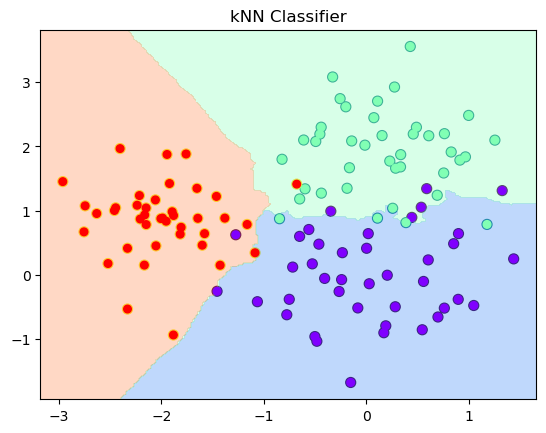

In [19]:
from sklearn.neighbors import KNeighborsClassifier

# kNN with 5 neighbours and euclidean distance (p=2)
model = KNeighborsClassifier(n_neighbors=7, p=2)   
model.fit(X,y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50)
visualize_classifier(model, X, y, title="kNN Classifier")
plt.show()

## The curse of dimensionality
One problem that arises with kNN is the curse of dimensionality. Not only does this plague kNN, but also Linear Smoothing (presented as extended material), local regression in general, and some other algorithms under the umbrella of non-parametric modelling (not discussed). The problem is the following: _distances break down in high dimensional spaces_.

What this means is that when we are dealing with high dimensional data, the distances between objects in high dimensional space are not very informative. Since kNN and LS rely on finding neighbouring points, their performance is affected negatively, to the point that they become useless.

- For a more concrete example, we will briefly mention the MNIST dataset, which we will employ more actively next week. This dataset is comprised of images of handwritten numbers (0-9), and thus has 10 classes. The features are comprised of a 28x28 grid of pixels, which amounts to 784 features.
- The curse of dimensionality applies here, as 784 is a relatively large number of features. What it implies is then that an image with class label '0' will have similar distance to an image with class label '8' as it does to other images in class '0'. It will also have a similar distance to an image with class label '3', or any of the other numbers. Since the distances are all roughly the same despite what the class labels are, kNN classification may have considerable difficulty separating the classes!

We can demonstrate this breakdown of distances through the following simulation experiment:

The set $[0,1]^d$ consists of $d$-dimensional vectors with elements between 0 and 1 and is called the $d$-dimensional unit cube. We can generate $n$ independent samples uniformly distributed on $[0,1]^d$ using the code: `np.random.random(low=0.0, high=1.0, size=(n, d))`.

The idea will be to sample $n=1000$ points on $[0,1]^d$ for increasing values of $d$. For each $d$, we will compute the pairwise Euclidean distances between the $n$ points and plot a histogram. As the dimension increases, we will see that the distribution of the distances becomes more and more concentrated. This is bad because it means that all the points have similar distance to each other, and so we cannot really figure out different labels for these points.

Note: that the 2-norm has min value zero, and max value $\sqrt{2}$, so for dimension 2, the maximum 2-norm is  $\sqrt{d}$, for `dim=100`, the maximum is $10$, etc, which is why the x-axis range changes from plot to plot.


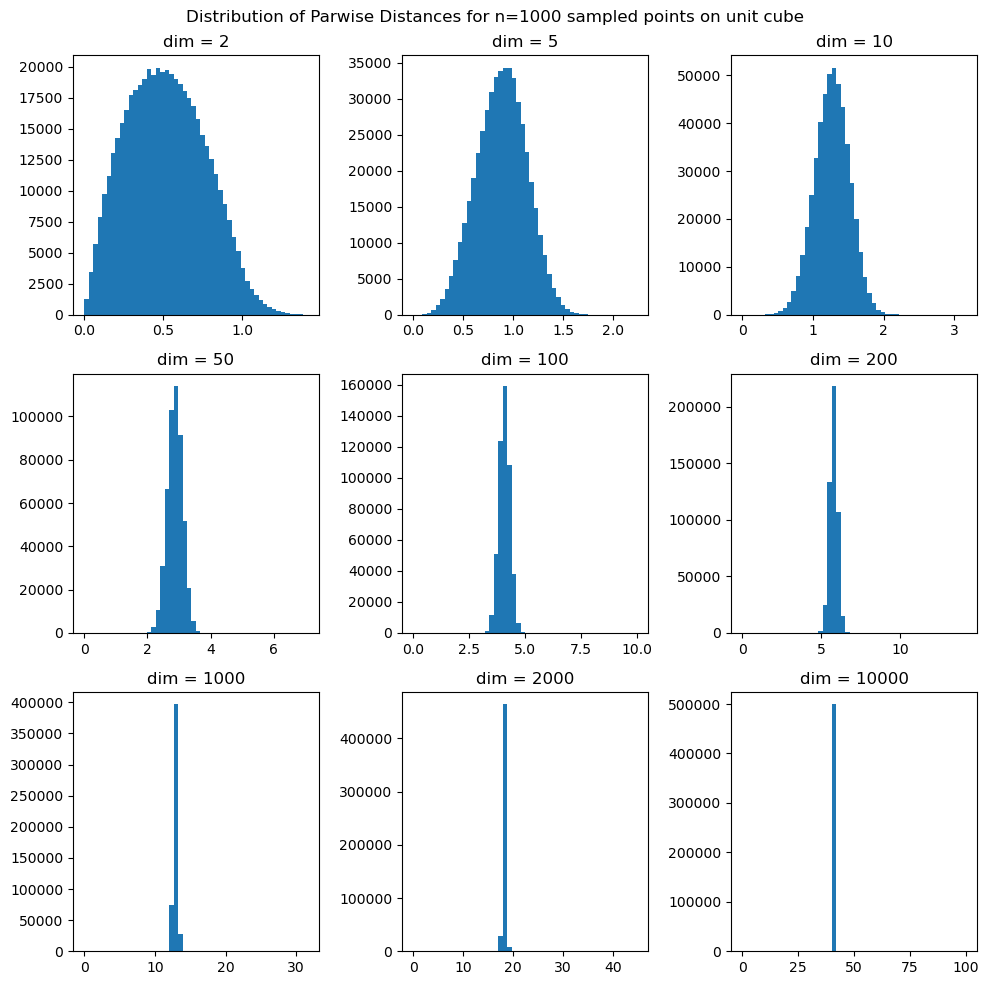

In [20]:
n = 1000
dims = [2, 5, 10, 50, 100, 200, 1000, 2000, 10000]
fig, axs = plt.subplots(3,3, figsize=(10,10))
for i, ax in enumerate(axs.flat):
    d = dims[i]
    
    # randomly sample N points from [0,1]^dim
    X = np.random.uniform(low=0., high=1., size=(n, d))
    
    # compute pairwise distances between the points
    pdists = np.array([np.linalg.norm(X[i]-X[j], ord=2) for i in range(n) for j in range (i+1, n)])
    
    # plot histogram
    ax.hist(pdists, range=[0, np.sqrt(d)], bins=50)  
    ax.set_title(f"dim = {d}")
plt.suptitle(f"Distribution of Parwise Distances for n={n} sampled points on unit cube")
plt.tight_layout()

## Advanced material: Linear Smoothing
From the earlier kNN regression exercise, you will most likely notice that the fitted regression function using kNN is quite jagged, especially for smaller values of $k$. To understand this behaviour, it helps to look at the specific form of kNN predictions which we wrote down earlier:

\begin{align*}
\hat{y}(x) &= \sum_{i=1}^n \frac{1}{k}\mathbf{1}\{\text{$X_i$ is a kNN of $x$} \} Y_i.
\end{align*}

Note that this is of the form: $\hat{y}(x) = \sum_{i=1}^n w_i(x) Y_i$, so we can think of kNN as producing a weighted average of the responses $Y_i$, where the weights are chosen based on the given $x$. The 'weighting' scheme in kNN is rather crude; it looks at the closest $k$ elements and cuts out the rest, resulting in a jagged fit. We can improve the kNN regression model by incorporating other weight functions that will induce a smoother fit. This is the idea behind Linear smoothing - an alternate approach to local regression, and we use special functions called kernels to define the weighting schemes. Specifically, we 
first define some common kernel functions:

1. Box-car Kernel: $K(u) = \mathbf{1} \{ |u| \le 1/2 \}$
2. Gaussian Kernel: $K(u) = \frac{1}{\sqrt{2 \pi}} \exp (-u^2/2)$ 
3. Epanechnikov Kernel: $K(u) = \frac{3}{4} (1-u^2) \mathbf{1} \{ |u| \le 1\}$

We then use a chosen kernel to construct a linear smoother which is defined by:

\begin{align*}
\hat{y}(x) 
&= \sum_{i=1}^n \frac{K \left (\frac{\| x - X_i \|_2}{h} \right )}{ \sum_{j=1}^n K \left (\frac{\| x - X_j \|_2}{h} \right ) } Y_i.
\end{align*}

In words, the $i$-th weight (the weight assigned to the $i$-th response $Y_i$) is the kernel function evaluated at the distance of $X_i$ from the input point $x$, and divided by a normalizing term to ensure that the weight add up to 1. The parameter $h$ is called the bandwidth, and plays a similar role as $k$ in kNN regression. Larger values of $h>0$ means we incorporate more information from points that are further away.

<font color='purple'>
    
#### Exercise: 
Implement the three kernels defined above.

In [21]:
#### Solution

def boxcar(u):
    cond = abs(u) <= 0.5
    return 1 * cond

def gaussian(u):
    t1 = 1/np.sqrt(2 * np.pi)
    return t1 * np.exp(-0.5 * u**2)

def epanechnikov(u):
    cond = abs(u) <= 1
    return cond * 0.75 * (1-u**2)

<font color='purple'>
    
#### Advanced Exercise: 
Write a function `LinearSmoother(X, y, kernel, h)` that implements LinearSmoother using the data from the previous kNN regression exercise. Demonstrate your code by plotting your fitted functions for various bandwidth values and the three kernels defined above. Use the bandwidths `[0.8, 0.9, 1, 3]` for the boxcar kernel, `[0.5, 0.8, 1, 3]` for the Epanechnikov kernel and `[0.4, 0.5, 1, 5]` for the Gaussian kernel. What do you notice happens to the fits as you vary the bandwidth?

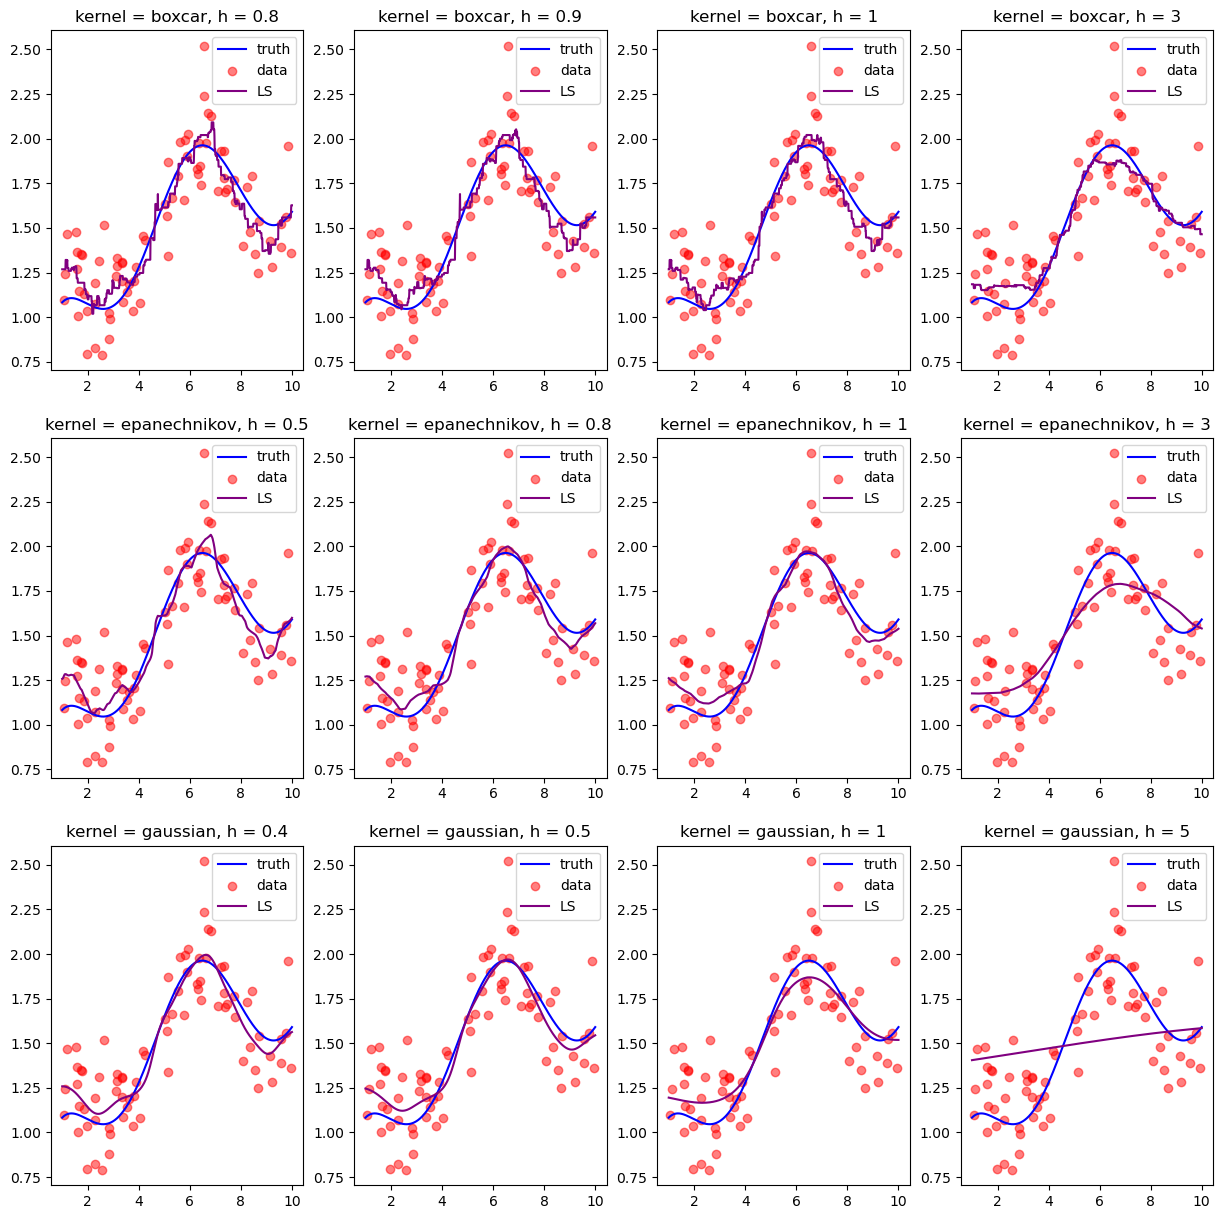

In [22]:
#### Solution
f = lambda x: 0.3 * np.cos(x) + 0.4 * np.log(10*x)
fsamples = f_sampler(f, 80, sigma=0.2, seed=120)
X = fsamples[:, 0]
y = fsamples[:, 1]

def LS_(x0, X, y, kernel, h):
    # given single point x0, returns linear smoother prediction
    
    # compute K(|x-X_i|/h) terms
    K = kernel(np.sqrt((X - x0)**2)/h)
    
    # sum to get normalization constant for weights
    Ksum = K.sum()
    
    # compute weights by dividing the K terms by their sum
    weights = K/Ksum if Ksum > 0 else np.zeros_like(y)

    return weights @ y

def LinearSmoother(x, X, y, kernel, h):
    # generalize LS_ to work on array of inputs
    return np.apply_along_axis(LS_, 1, x.reshape(-1,1), X, y, kernel, h)

bandwidth_grid = {
    boxcar: [0.8, 0.9, 1, 3],
    epanechnikov: [0.5, 0.8, 1, 3],
    gaussian: [0.4, 0.5, 1, 5]
}
fig, axes = plt.subplots(3, 4, figsize=(15, 15))
xx = np.linspace(1, 10, 1000)
for i, (kern, h_grid) in enumerate(bandwidth_grid.items()): 
    for j, h in enumerate(h_grid):
        axes[i,j].plot(xx, f(xx), label="truth", color="blue")
        axes[i,j].scatter(X, y, label="data", color="red", alpha=0.5)
        axes[i,j].plot(xx, LinearSmoother(xx, X, y, kern, h),
                       label="LS", color="purple")
        axes[i,j].set_title(f"kernel = {kern.__name__}, h = {h}")
        axes[i,j].legend()

plt.show()

#### Existing Implementations
Unfortunately, there are no `sklearn` implementations of the linear smoother, however a good implementation does exist in `scipy.statsmodels.nonparametric.kernel_regression`, (kernel regression, Nadaraya-Watson) are two different names commonly used for linear smoothing. You can read more about it here:

https://www.statsmodels.org/dev/generated/statsmodels.nonparametric.kernel_regression.KernelReg.html